In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("911.csv")

In [3]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"], errors="coerce")

In [4]:
df["Hour"] = df["timeStamp"].dt.hour
df["DayOfWeek"] = df["timeStamp"].dt.day_name()
df["Month"] = df["timeStamp"].dt.month_name()
df["Year"] = df["timeStamp"].dt.year

C:\Users\sgupt\AppData\Local\Temp\ipykernel_19212\2327449685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Reason", order=df["Reason"].value_counts().index, palette="Set2")


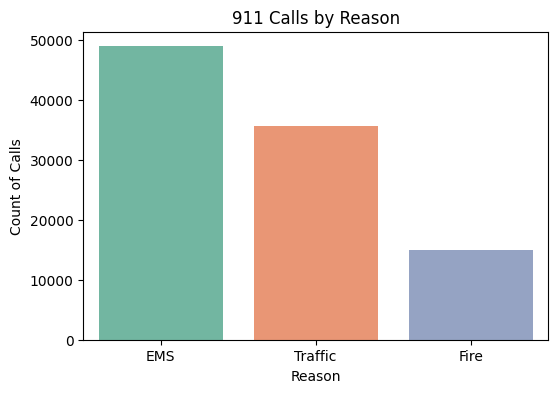

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Reason", order=df["Reason"].value_counts().index, palette="Set2")
plt.title("911 Calls by Reason")
plt.xlabel("Reason")
plt.ylabel("Count of Calls")
plt.show()

In [5]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0] if ":" in x else x)
df["SubType"] = df["title"].apply(lambda x: x.split(":")[1] if ":" in x else "Unknown")


C:\Users\sgupt\AppData\Local\Temp\ipykernel_19212\3412042722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="coolwarm")


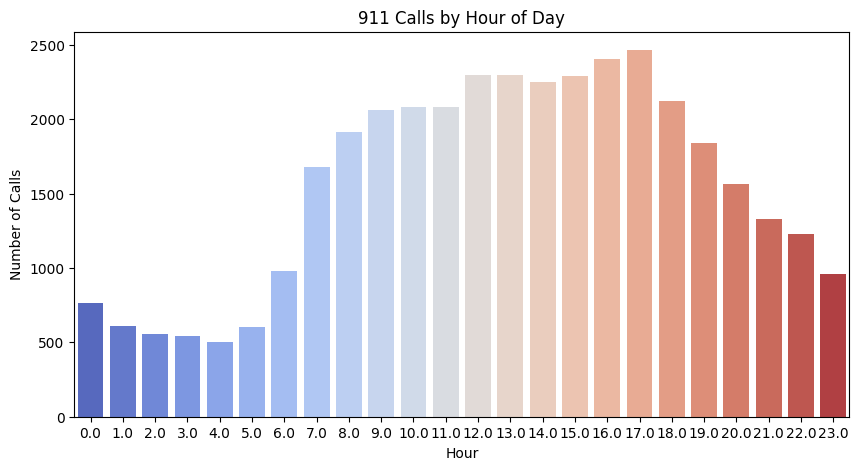

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Hour", palette="coolwarm")
plt.title("911 Calls by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Calls")
plt.show()

C:\Users\sgupt\AppData\Local\Temp\ipykernel_19212\2299108427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="DayOfWeek", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="viridis")


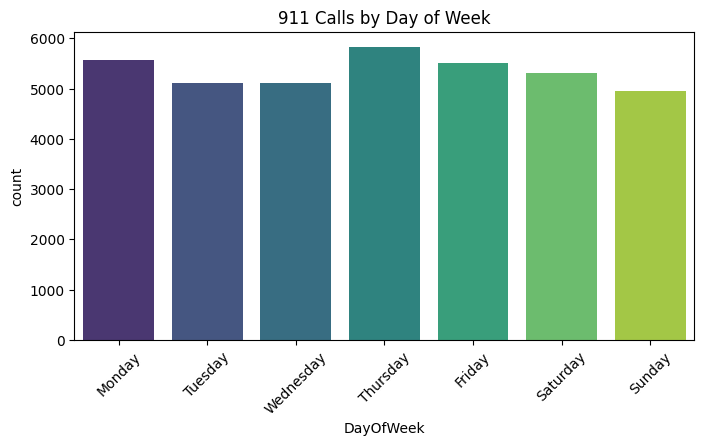

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="DayOfWeek", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], palette="viridis")
plt.title("911 Calls by Day of Week")
plt.xticks(rotation=45)
plt.show()

C:\Users\sgupt\AppData\Local\Temp\ipykernel_19212\784981355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Month", order=df["Month"].value_counts().index, palette="pastel")


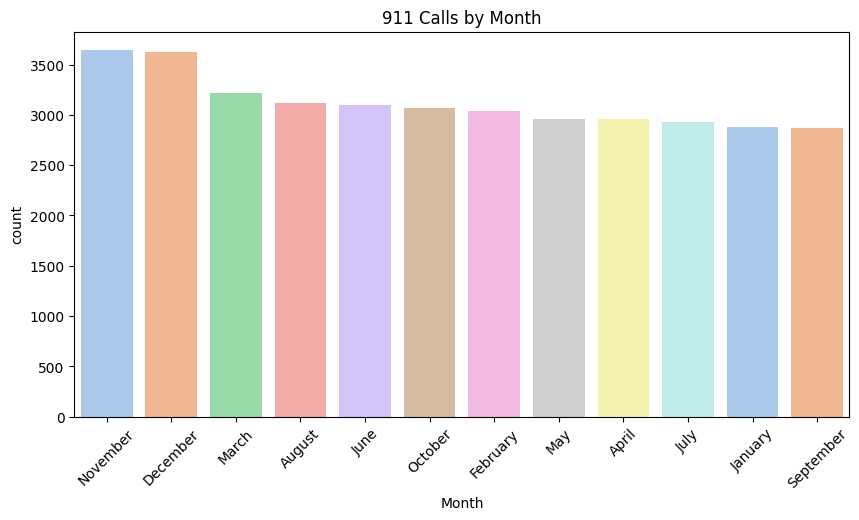

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Month", order=df["Month"].value_counts().index, palette="pastel")
plt.title("911 Calls by Month")
plt.xticks(rotation=45)
plt.show()

C:\Users\sgupt\AppData\Local\Temp\ipykernel_19212\4079477675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="Set1")


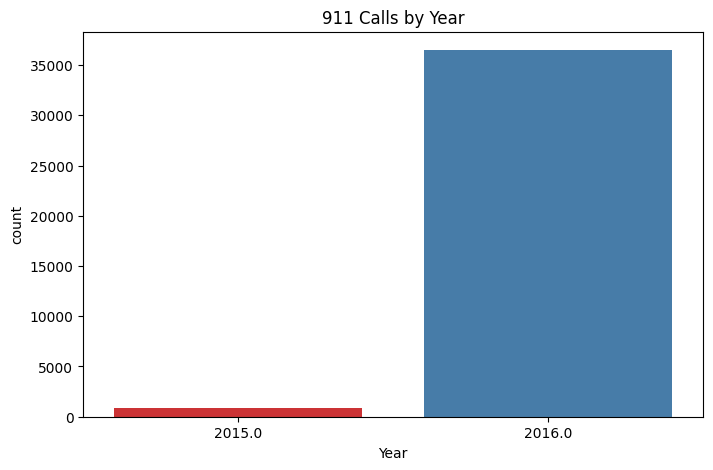

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Year", palette="Set1")
plt.title("911 Calls by Year")
plt.show()

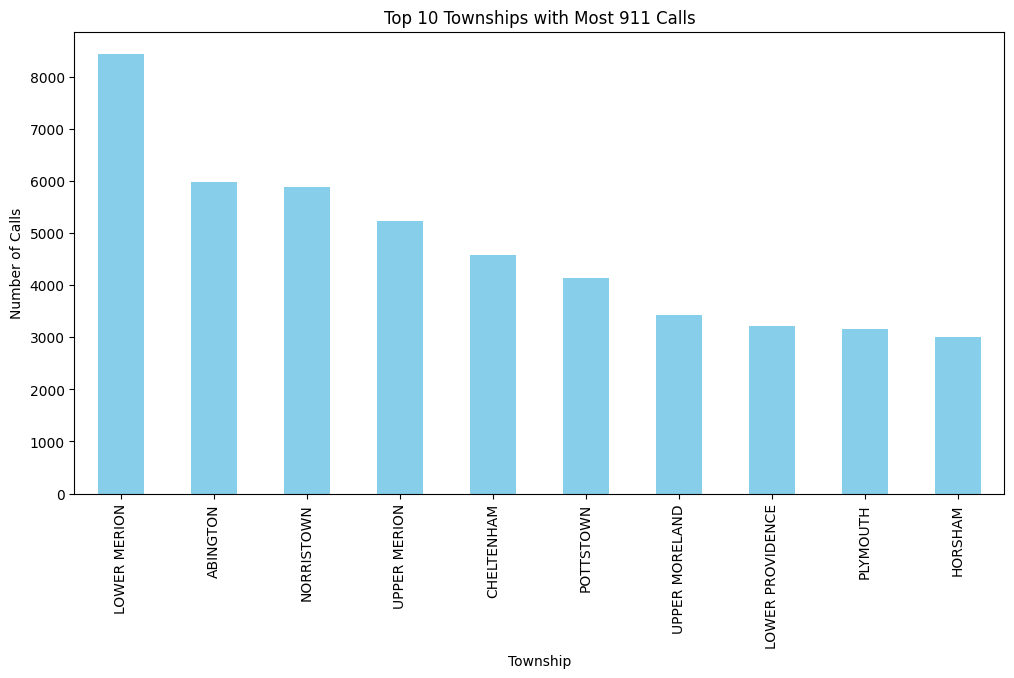

In [12]:
plt.figure(figsize=(12,6))
df["twp"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Townships with Most 911 Calls")
plt.xlabel("Township")
plt.ylabel("Number of Calls")
plt.show()

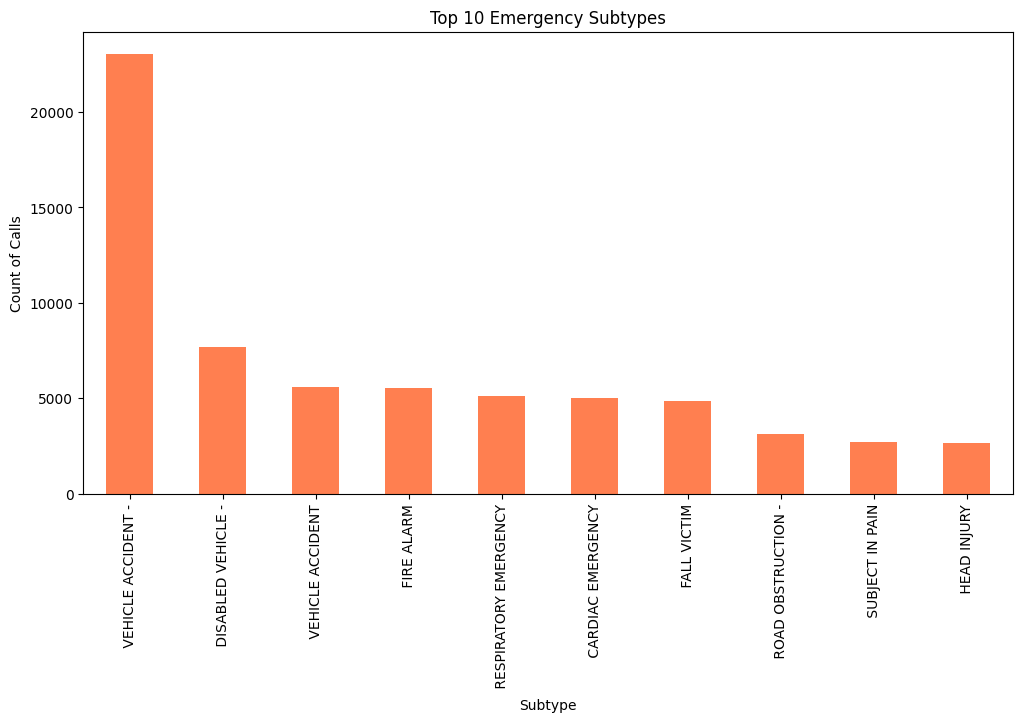

In [13]:
plt.figure(figsize=(12,6))
df["SubType"].value_counts().head(10).plot(kind="bar", color="coral")
plt.title("Top 10 Emergency Subtypes")
plt.xlabel("Subtype")
plt.ylabel("Count of Calls")
plt.show()

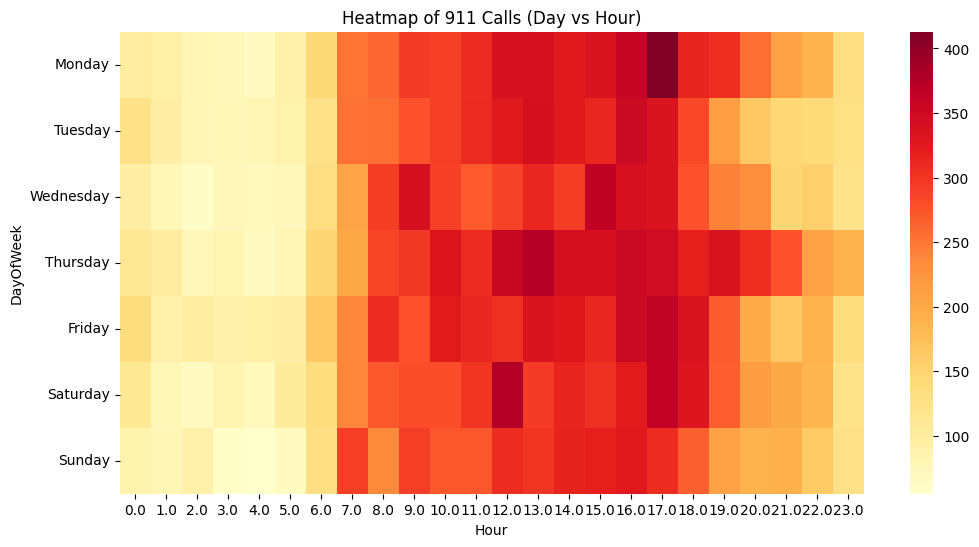

In [15]:
plt.figure(figsize=(12,6))
calls_heatmap = df.groupby(["DayOfWeek","Hour"]).size().reset_index(name="Count")
calls_pivot = calls_heatmap.pivot(index="DayOfWeek", columns="Hour", values="Count")
calls_pivot = calls_pivot.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sns.heatmap(calls_pivot, cmap="YlOrRd")
plt.title("Heatmap of 911 Calls (Day vs Hour)")
plt.show()

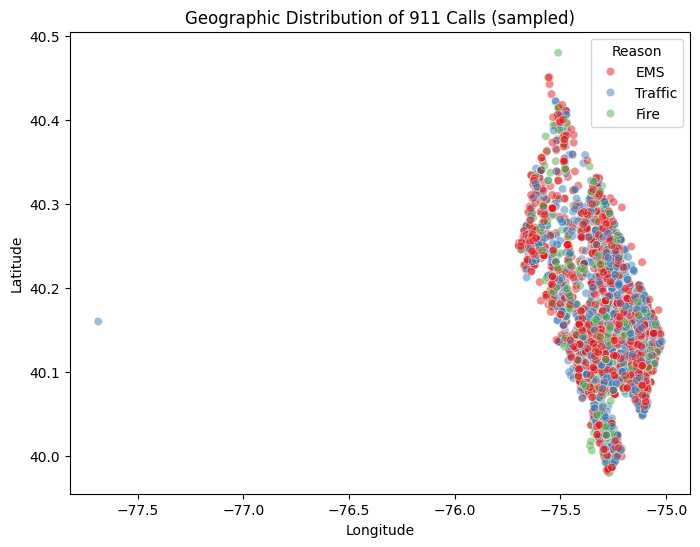

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(5000), x="lng", y="lat", hue="Reason", alpha=0.5, palette="Set1")
plt.title("Geographic Distribution of 911 Calls (sampled)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

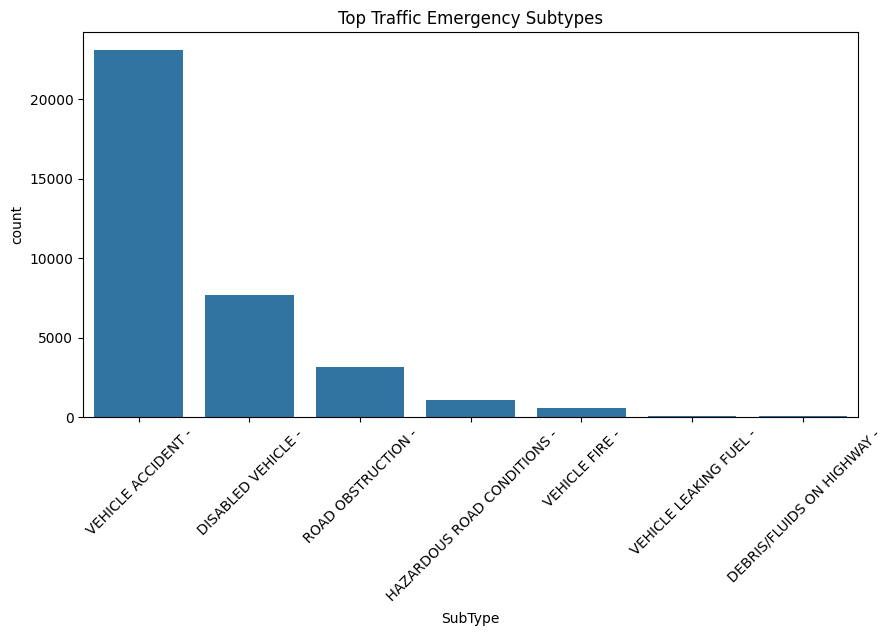

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df["Reason"]=="Traffic"], x="SubType", order=df[df["Reason"]=="Traffic"]["SubType"].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Top Traffic Emergency Subtypes")
plt.show()

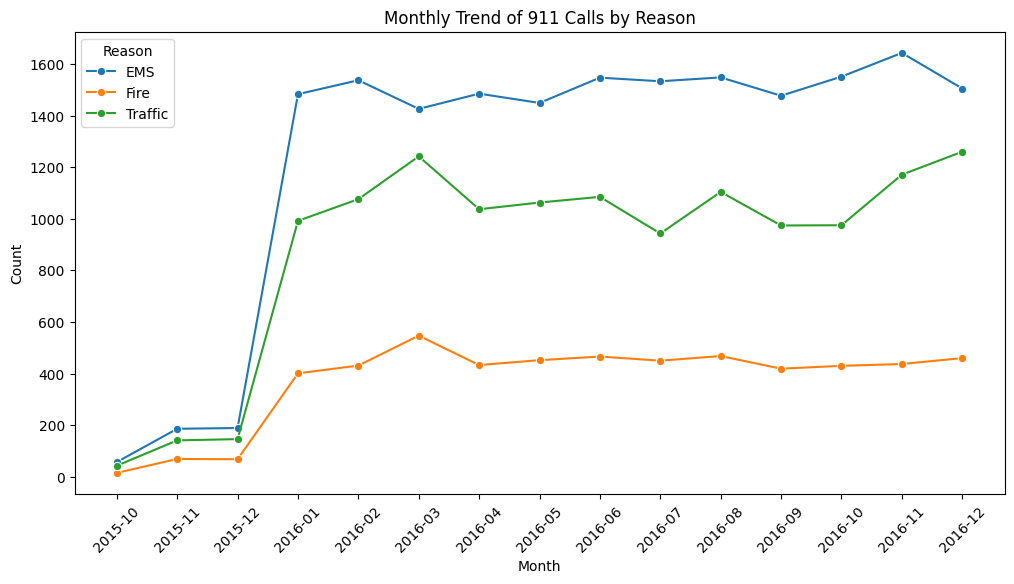

In [18]:
monthly = df.groupby([df["timeStamp"].dt.to_period("M"), "Reason"]).size().reset_index(name="Count")
monthly["Month"] = monthly["timeStamp"].astype(str)
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x="Month", y="Count", hue="Reason", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Trend of 911 Calls by Reason")
plt.show()

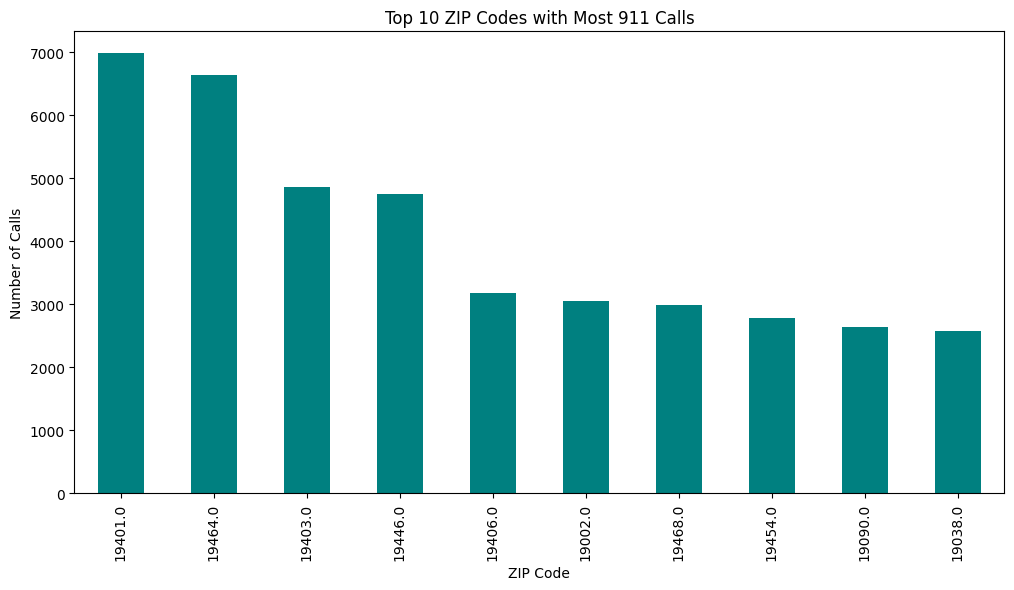

In [19]:
plt.figure(figsize=(12,6))
df["zip"].value_counts().head(10).plot(kind="bar", color="teal")
plt.title("Top 10 ZIP Codes with Most 911 Calls")
plt.xlabel("ZIP Code")
plt.ylabel("Number of Calls")
plt.show()